# Data generation

Here, the necessary libraries are being setup

In [1]:
pip install julia

Note: you may need to restart the kernel to use updated packages.


In [2]:
import julia as jl
jl.install()

The emulator is aimed at providing in-silico data to test some of the machine learning tool discussed during the course.
The emulator is mimicking the behavior of a fed-batch cell culture process, where only few components are present:
- The cells, responsible for the production of the product, which are consuming glucose to sustain metabolism and producing lactate as by-product. These are indicated by VCD (viable cell density), typically expressed in million cells / ml.
- Glucose (Glc) is consumed by the cells and it is continuously fed to the process (F_glc). Too low glucose concentrations are slowing down cell growth and product production. To high glucose concentrations are poisoning the system and accelerating cell death.
- Lactate (Lac) is a by-product of the cells and it is poisoning the cells, so that too high lactate concentrations are slowing down cell metabolism and accelerating cell death
- Product (Prod) is produced by the cells. The faster the cells are growing, the less are producing the product. 

## Model Equations

The emulator's results are based on the following equations to create the in-sillico data

- Balance on VCD:  $\frac{dVCD}{dt}$ = (μ<sub>g</sub> - μ<sub>d</sub>)VCD
- Balance on Glucose: $\frac{dGlc}{dt}$ = $-k_{Glc} \frac{Glc}{Glc + 0.05}$VCD + F<sub>Glc</sub>
- Balance on Lactate: $\frac{dLac}{dt}$ = k<sub>Lac</sub> VCD
- Balance on Product: $\frac{dProd}{dt}$ = k<sub>Prod</sub>$\frac{Glc}{Glc + K_{g, Glc} }$ ($\frac{μ_{g}}{μ_{g,max}}$)<sup>2</sup>VCD

Where:
- Growth rate: $μ_{g} =  μ_{g,max}\frac{Glc}{Glc +K_{g, Glc}}\frac{K_{i, Lac}}{Lac+K_{i, Lac}} $
- Death rate: $μ_{d} = μ_{d,max}(1+\frac{φ}{1+φ})\frac{Lac}{Lac+K_{d, Lac}}$
- Glc saturation: φ = e<sup>0.1(Glc-75)</sup>

$\frac{}{}$

## Parameter selection

The emulator will simulate a predefined number of experiments. The results of those experiments is based on the   intervals of the desired parameters (from initial conditions to the number of experiments). These experiments will then be used to create the dataset that will be used in the subsequent sections of the code. You will have the opportunity to define those ranges in the sections below.

### Parameters' ranges

Define the value range of the maximum growth rate interval $μ_{g,max}$

In [3]:
mu_g_max = [0.01, 0.10]

Define the value range of the maximum death rate interval $μ_{d,max}$

In [4]:
mu_d_max = [0.025, 0.075]

Define the value range of the $K_{g,Glc}$

In [5]:
K_g_Glc = [1, 2]

Define the value range of the $K_{g,Lac}$

In [6]:
K_g_Lac = [50, 80]

Define the value range of the $K_{I,Lac}$

In [7]:
K_I_Lac = [30, 50]

Define the value range of the $K_{d,Lac}$

In [8]:
K_d_Lac = [50, 80]

Define the value range of the $k_{Glc}$

In [9]:
k_Glc = [0.04, 0.12]

Define the value range of the $k_{Lac}$

In [10]:
k_Lac = [0.06, 0.15]

Define the value range of the $k_{prod}$

In [11]:
k_Prod = [1, 3]

Define the value range of the days at which Glc feed is started

In [12]:
feed_start = [3, 6]

Define the value range of the days at which Glc feed is ended

In [13]:
feed_end = [12.0, 16]

Define the Glc feed rate

In [14]:
Glc_feed_rate = [12.0, 15.0]

Define the initial glucose feed values ranges

In [15]:
Glc_0 = [12.0, 15.0]

Define the initial VCD value ranges

In [16]:
VCD_0 = [0.3, 0.6]

Define the number of experiments to be generated in the simulator

In [17]:
num_exp = 20

In [18]:
#data generation parameters
import pandas as pd

# format is variable = [lower bound, upper bound]
mu_g_max = [0.01, 0.10]
mu_d_max = [0.025, 0.075]
K_g_Glc = [1, 2]
K_g_Lac = [50, 80]
K_I_Lac = [30, 50]
K_d_Lac = [50, 80]
k_Glc = [0.04, 0.12]
k_Lac = [0.06, 0.15]
k_Prod = [1, 3]
feed_start = [3, 6]
feed_end = [12.0, 16]
Glc_feed_rate = [12.0, 15.0]
Glc_0 = [12.0, 15.0]
VCD_0 = [0.3, 0.6]

num_exp = 20




Here, an aggregation of the generated data is shown in table form

In [19]:
j = jl.Julia()
generate_data =j.include("../../test.jl") #the generated data is saved into 'mytable.csv' in the same directory as this notebook

var_lims = {"mu_g_max":mu_g_max,
    "mu_d_max": mu_d_max,
    "K_g_Glc" : K_g_Glc,
    "K_g_Lac" : K_g_Lac,
    "K_I_Lac" : K_I_Lac,
    "K_d_Lac" : K_d_Lac,
    "k_Glc" : k_Glc,
    "k_Lac" : k_Lac,
    "k_Prod" : k_Prod,
    "feed_start" : feed_start,
    "feed_end" : feed_end,
    "Glc_feed_rate" : Glc_feed_rate,
    "Glc_0" : Glc_0,
    "VCD_0" : VCD_0}


# Use the function to generate data
data = generate_data(var_lims, num_exp)
data

C:\Users\Arnaldo\AppData\Local\Programs\Python\Python39\lib\site-packages\julia\core.py:703: FutureWarning: Accessing `Julia().<name>` to obtain Julia objects is deprecated.  Use `from julia import Main; Main.<name>` or `jl = Julia(); jl.eval('<name>')`.
  warnings.warn(


<PyCall.jlwrap 300×5 DataFrame
 Row │ timestamps  X:VCD         X:Glc         X:Lac     X:Titer
     │ Float64     Float64       Float64       Float64   Float64
─────┼───────────────────────────────────────────────────────────────
   1 │        0.0  12.1765       13.2353         0.0     0.0
   2 │        1.0  10.4226        0.000136509   16.2926  0.00136778
   3 │        2.0   7.35719      -6.36753e-5    28.8508  0.00137461
   4 │        3.0   4.73613       0.00186829    37.2964  0.00307922
   5 │        4.0   2.91031       0.00283586    42.6044  0.0176858
   6 │        5.0   1.74435       0.00500096    45.8249  0.0327184
   7 │        6.0   1.03081       5.09691e-5    47.742   0.0428364
   8 │        7.0   0.603409      0.000166979   48.8693  0.042837
   9 │        8.0   0.351608      0.000109606   49.5277  0.0428374
  10 │        9.0   0.204346      8.88137e-5    49.9109  0.0428376
  11 │       10.0   0.118582     -0.000146454   50.1334  0.0428377
  12 │       11.0   0.0687525    -1.

Alternatively, you can run the simulator to obtain one singular experiment by defining the variable values

In [74]:
generate_data =j.include("../../test_one_exp.jl") #the generated data is saved into 'mytable.csv' in the same directory as this notebook

mu_g_max = 0.01
mu_d_max = 0.025
K_g_Glc = 1
K_g_Lac = 50
K_I_Lac = 30
K_d_Lac = 50
k_Glc = 0.04
k_Lac = 0.06
k_Prod = 1
feed_start = 3
feed_end = 12.0
Glc_feed_rate = 12.0
Glc_0 = 12.0
VCD_0 = 0.3

num_exp = 20


# Use the function to generate data
data = generate_data(feed_start, feed_end, Glc_feed_rate, Glc_0, VCD_0, mu_g_max, mu_d_max, K_g_Glc, K_I_Lac, K_d_Lac, k_Glc, k_Lac, k_Prod)
data

<PyCall.jlwrap 15×5 DataFrame
 Row │ timestamps  X:VCD     X:Glc      X:Lac      X:Titer
     │ Float64     Float64   Float64    Float64    Float64
─────┼────────────────────────────────────────────────────────
   1 │        0.0  0.3         12.0      0.0        0.0
   2 │        1.0  0.372643    11.6795   0.482804   0.0540599
   3 │        2.0  0.457949    11.2835   1.0793     0.152189
   4 │        3.0  0.55563     10.807    1.80765    0.326888
   5 │        4.0  0.661556   298.214    2.68475    0.41949
   6 │        5.0  0.764492   585.529    3.71213    0.585826
   7 │        6.0  0.857691   872.749    4.88184    0.898339
   8 │        7.0  0.932195  1159.89     6.17332    1.42552
   9 │        8.0  0.980508  1446.97     7.55398    2.22899
  10 │        9.0  0.998178  1734.02     8.98245    3.34561
  11 │       10.0  0.984647  2021.06    10.4137     4.77383
  12 │       11.0  0.943075  2308.13    11.8047     6.47068
  13 │       12.0  0.879299  2593.43    13.119      8.36059
  14 │ 

## Construction of an OWU matrix from the generated data

For better visualisation of the in-sillico data, the data was reshaped into an OWU matrix. So, the values of each variable are separated by experiment.

In [20]:
from src.courses_notebooks.transformations import owu_from_csv
data = "mytable.csv"
owu = owu_from_csv(data)
pd.set_option('display.max_rows', None)

owu

X:VCD         X:Glc       X:Lac   X:Titer
run timestamps                                               
 0  0.0         12.176471  1.323529e+01    0.000000  0.000000
    1.0         10.422556  1.365093e-04   16.292639  0.001368
    2.0          7.357192 -6.367533e-05   28.850784  0.001375
    3.0          4.736131  1.868293e-03   37.296395  0.003079
    4.0          2.910311  2.835864e-03   42.604437  0.017686
    5.0          1.744346  5.000963e-03   45.824940  0.032718
    6.0          1.030814  5.096914e-05   47.742008  0.042836
    7.0          0.603409  1.669794e-04   48.869336  0.042837
    8.0          0.351608  1.096059e-04   49.527731  0.042837
    9.0          0.204346  8.881372e-05   49.910875  0.042838
    10.0         0.118582 -1.464535e-04   50.133380  0.042838
    11.0         0.068753 -1.077390e-05   50.262444  0.042838
    12.0         0.039842 -3.547467e-06   50.337254  0.042838
    13.0         0.023082  3.418417e-05   50.380601  0.042838
    14.0         0.013370  9.710341e-05   50.405710  0.042838
 1  0.0         12.529412  1.252941e+01    0.000000  0.000000
    1.0          9.558675  1.407958e-04   30.172574  0.001047
    2.0          5.762142  1.891194e-03   50.278517  0.011743
    3.0          3.216730  3.630068e-03   61.912714  0.028597
    4.0          1.738393 -8.627849e-05   68.300161  0.037793
    5.0          0.925018  1.218417e-04   71.724869  0.037794
    6.0          0.488507 -1.422522e-04   73.540266  0.037794
    7.0          0.256993 -6.347249e-05   74.497138  0.037795
    8.0          0.134930  1.180274e-04   75.000026  0.037795
    9.0          0.070770 -5.841690e-05   75.263924  0.037795
    10.0         0.037098  9.505051e-05   75.402299  0.037795
    11.0         0.019442 -9.625047e-05   75.474826  0.037795
    12.0         0.010187  1.570012e-04   75.512832  0.037795
    13.0         0.005338 -2.863875e-05   75.532746  0.037795
    14.0         0.002796  7.326845e-05   75.543179  0.037795
 2  0.0         13.588235  1.482353e+01    0.000000  0.000000
    1.0         12.362525 -5.701983e-05   12.626381  0.001581
    2.0          9.929060  1.331006e-03   23.362184  0.023459
    3.0          7.457953  1.497750e-03   31.685738  0.052215
    4.0          5.388989  1.685359e-04   37.813917  0.072666
    5.0          3.802373  6.175553e-05   42.188252  0.072671
    6.0          2.643665 -1.564399e-04   45.251704  0.072675
    7.0          1.820726  8.957870e-05   47.371452  0.072677
    8.0          1.246217  1.518683e-04   48.826805  0.072679
    9.0          0.849505  2.328038e-06   49.820892  0.072680
    10.0         0.577503 -1.487904e-04   50.497603  0.072681
    11.0         0.391879  1.685575e-04   50.957220  0.072681
    12.0         0.265594  1.230079e-04   51.268912  0.072681
    13.0         0.179856  3.099142e-05   51.480073  0.072682
    14.0         0.121729 -8.023110e-05   51.623029  0.072682
 3  0.0         14.294118  1.305882e+01    0.000000  0.000000
    1.0         11.663190  1.405016e-04   15.805166  0.001182
    2.0          7.412848  1.463963e-03   27.078368  0.002025
    3.0          4.202947  2.694905e-03   33.829347  0.016401
    4.0          2.257473  5.010805e-03   37.552583  0.031216
    5.0          1.180896 -1.577972e-04   39.525920  0.043146
    6.0          0.609367  1.688565e-04   40.551122  0.043146
    7.0          0.312358 -1.624670e-04   41.078383  0.043147
    8.0          0.159573  1.551502e-04   41.348197  0.043147
    9.0          0.081381 -1.017369e-04   41.485919  0.043147
    10.0         0.041468  1.273365e-04   41.556125  0.043147
    11.0         0.021121 -9.751822e-05   41.591891  0.043147
    12.0         0.010755  1.621840e-04   41.610105  0.043147
    13.0         0.005476  1.001249e-04   41.619380  0.043147
    14.0         0.002788  2.530529e-05   41.624102  0.043147
 4  0.0         13.058824  1.429412e+01    0.000000  0.000000
    1.0          9.872780  4.715095e-07   15.414714  0.001158
    2.0          5.448547  2.686012e-03   25.231204 

Furthermore, the evolution of each variable with respect to time is also visible here, but this time in the form of a graph

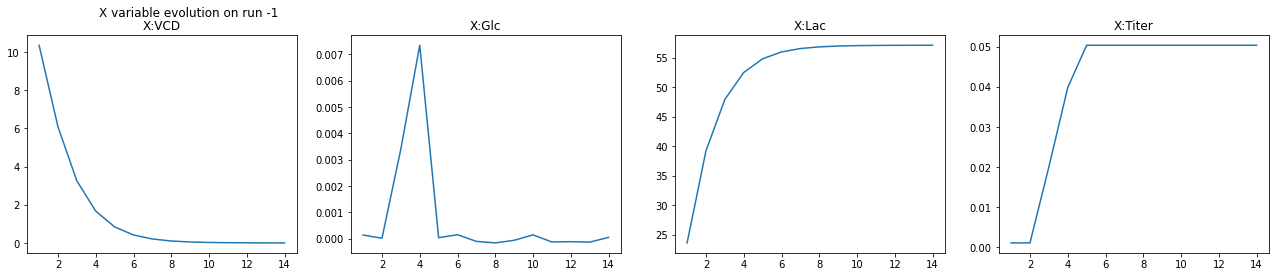

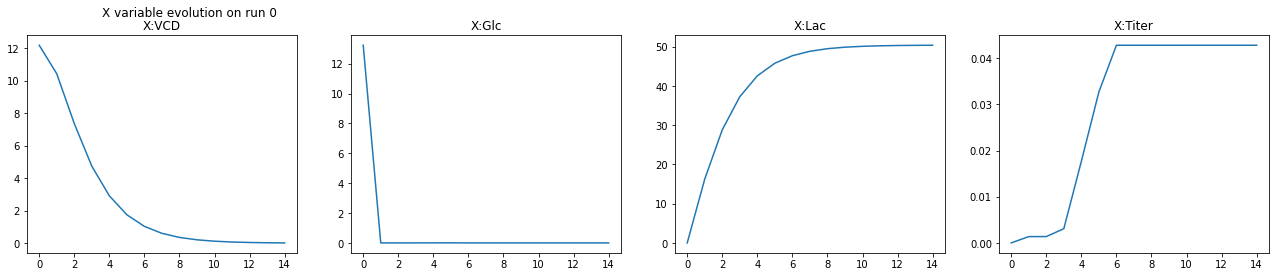

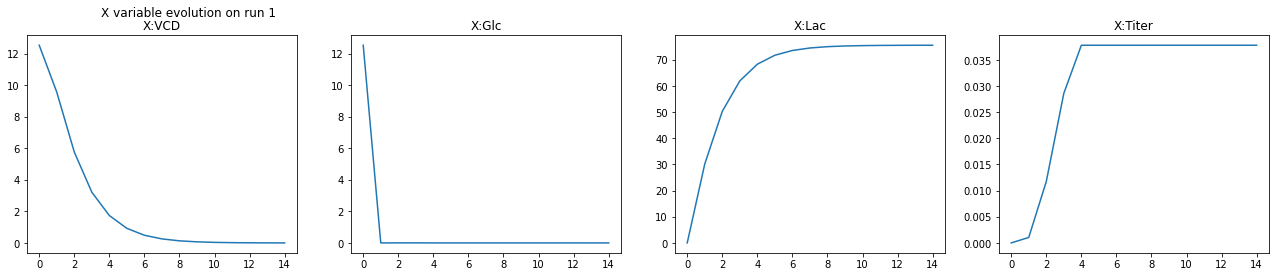

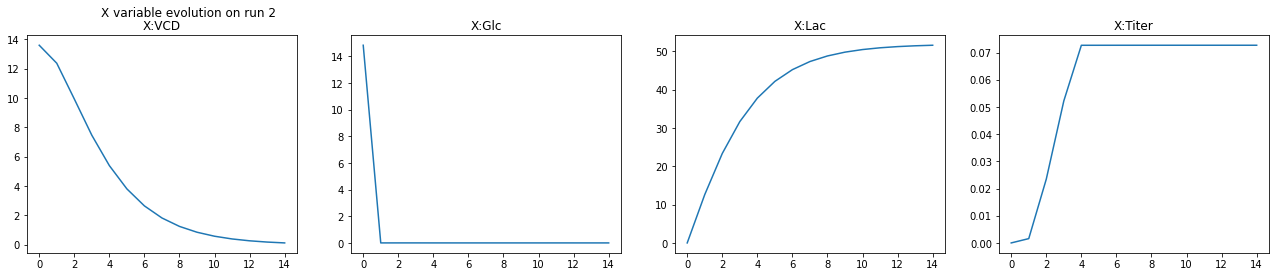

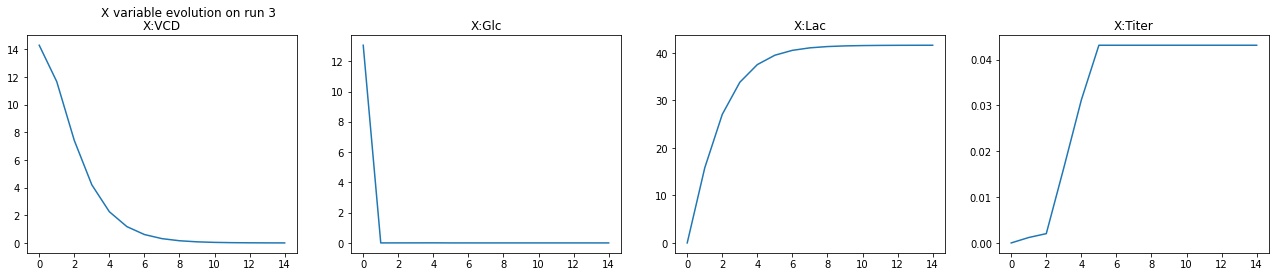

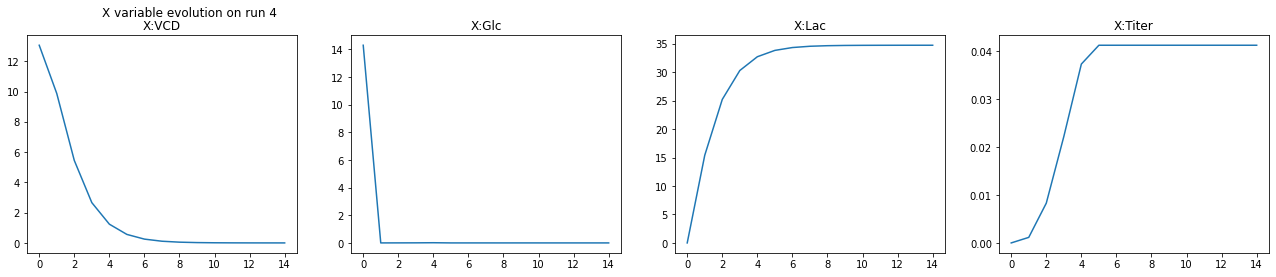

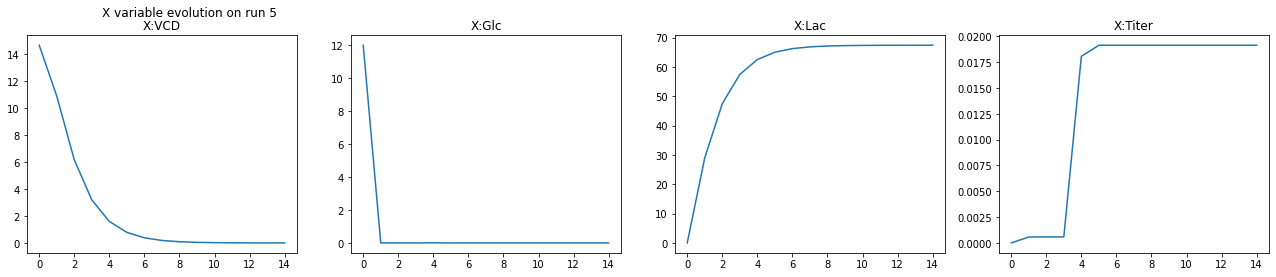

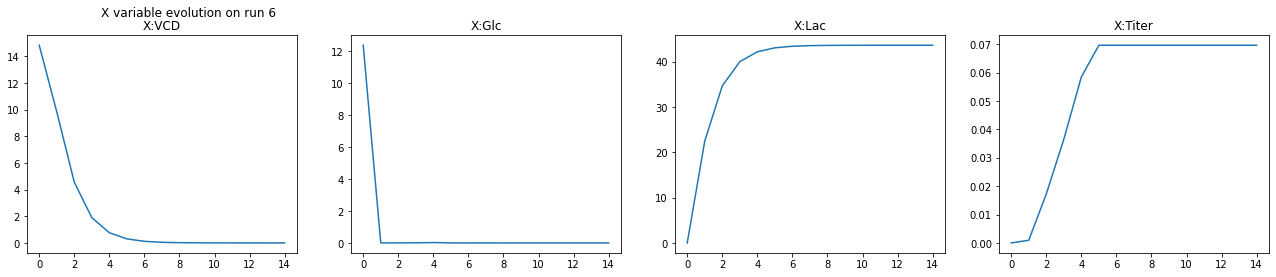

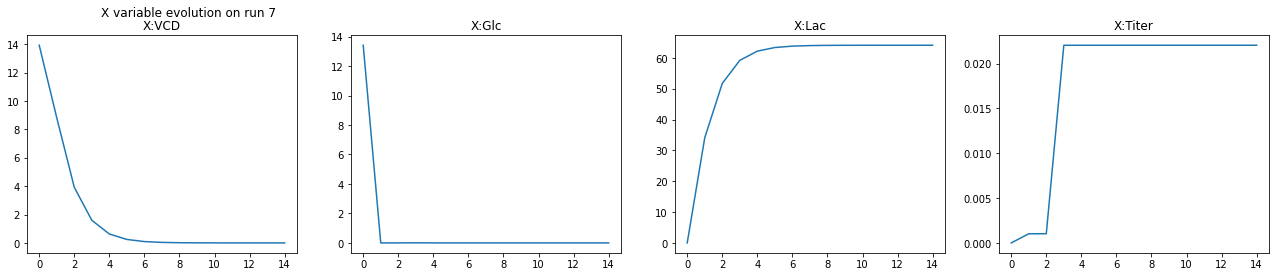

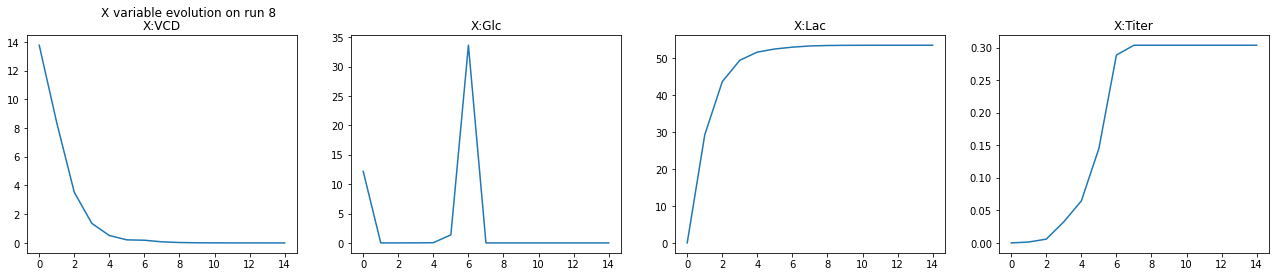

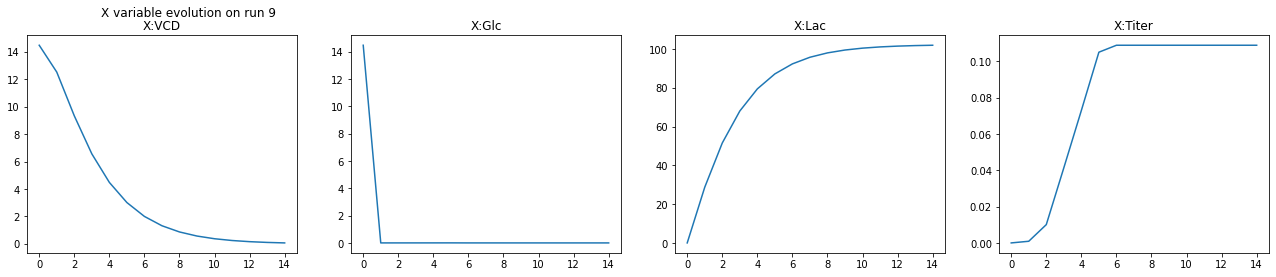

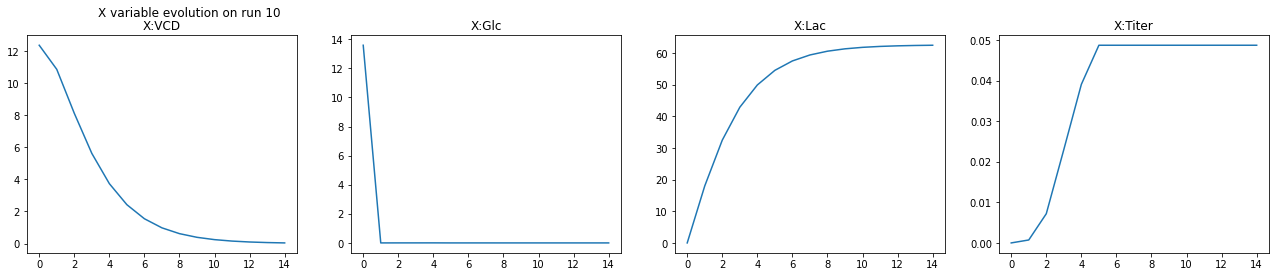

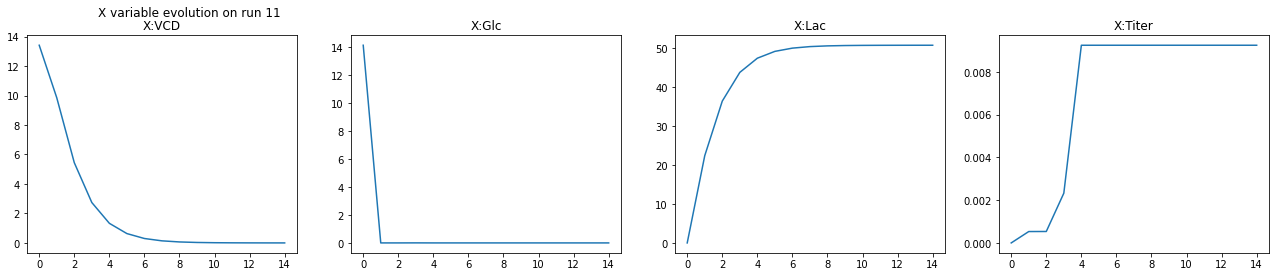

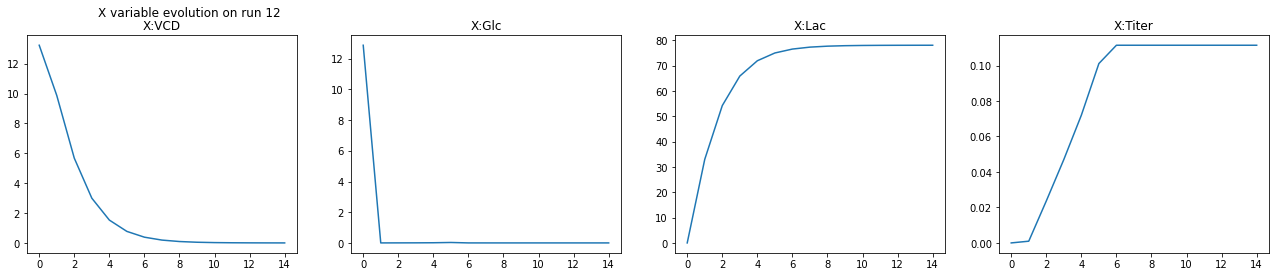

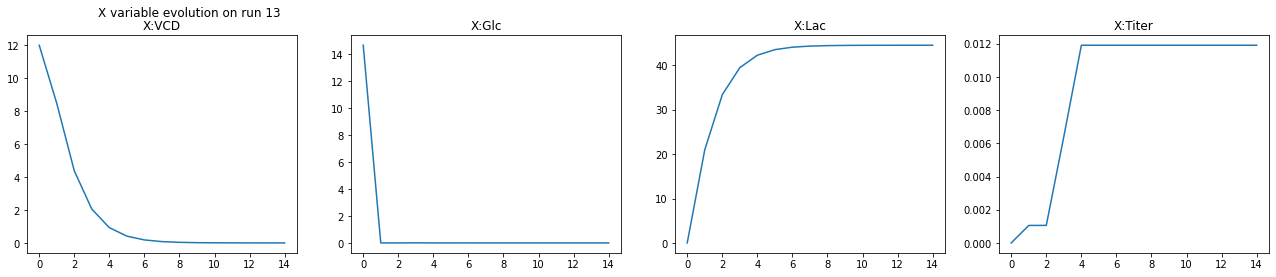

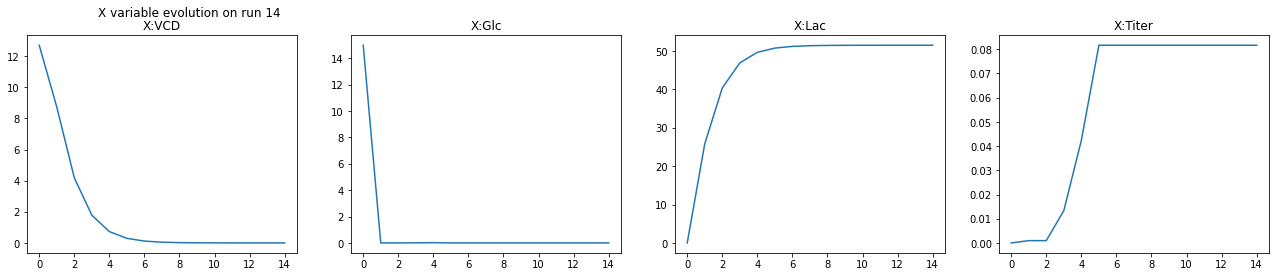

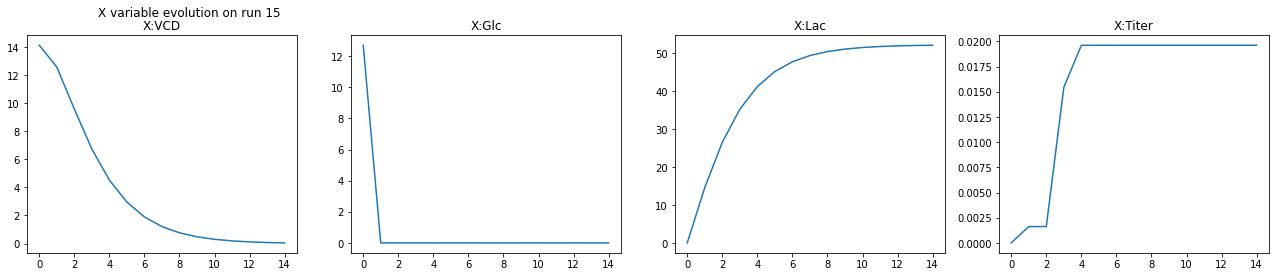

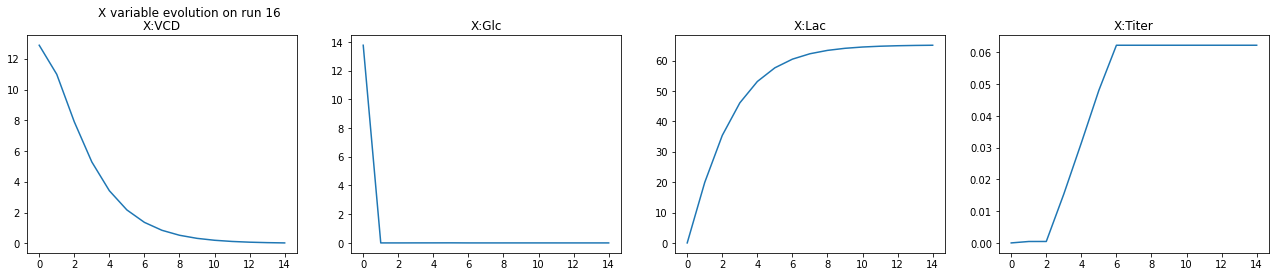

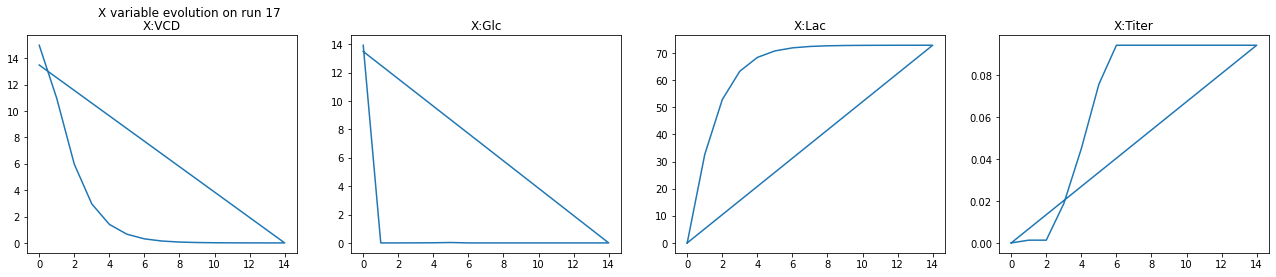

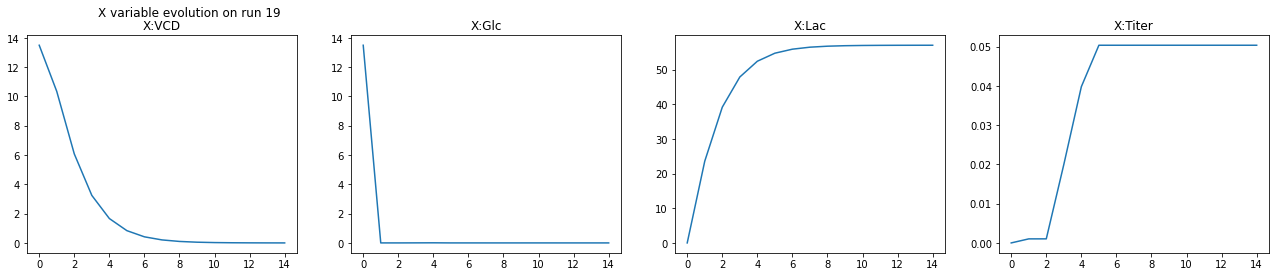

In [29]:
from matplotlib import pyplot as plt

#[print(run) for ix,run in owu.groupby("run")]
columns = list(owu.columns)
num_vars=len(columns)


for run_ix,run in owu.groupby("run"):
    fig, axs = plt.subplots(1,num_vars)
    fig.suptitle(f'X variable evolution on run {run_ix}')
    for plot_ix, col in enumerate(columns):
        axs[ plot_ix].plot(run.index.get_level_values("timestamps"),list(run[col].values))
        axs[ plot_ix].set_title(f'{col}')
        plt.subplots_adjust(right=3)

Now, to visualise the daa in another way, the data of all runs will be shown in a single graph

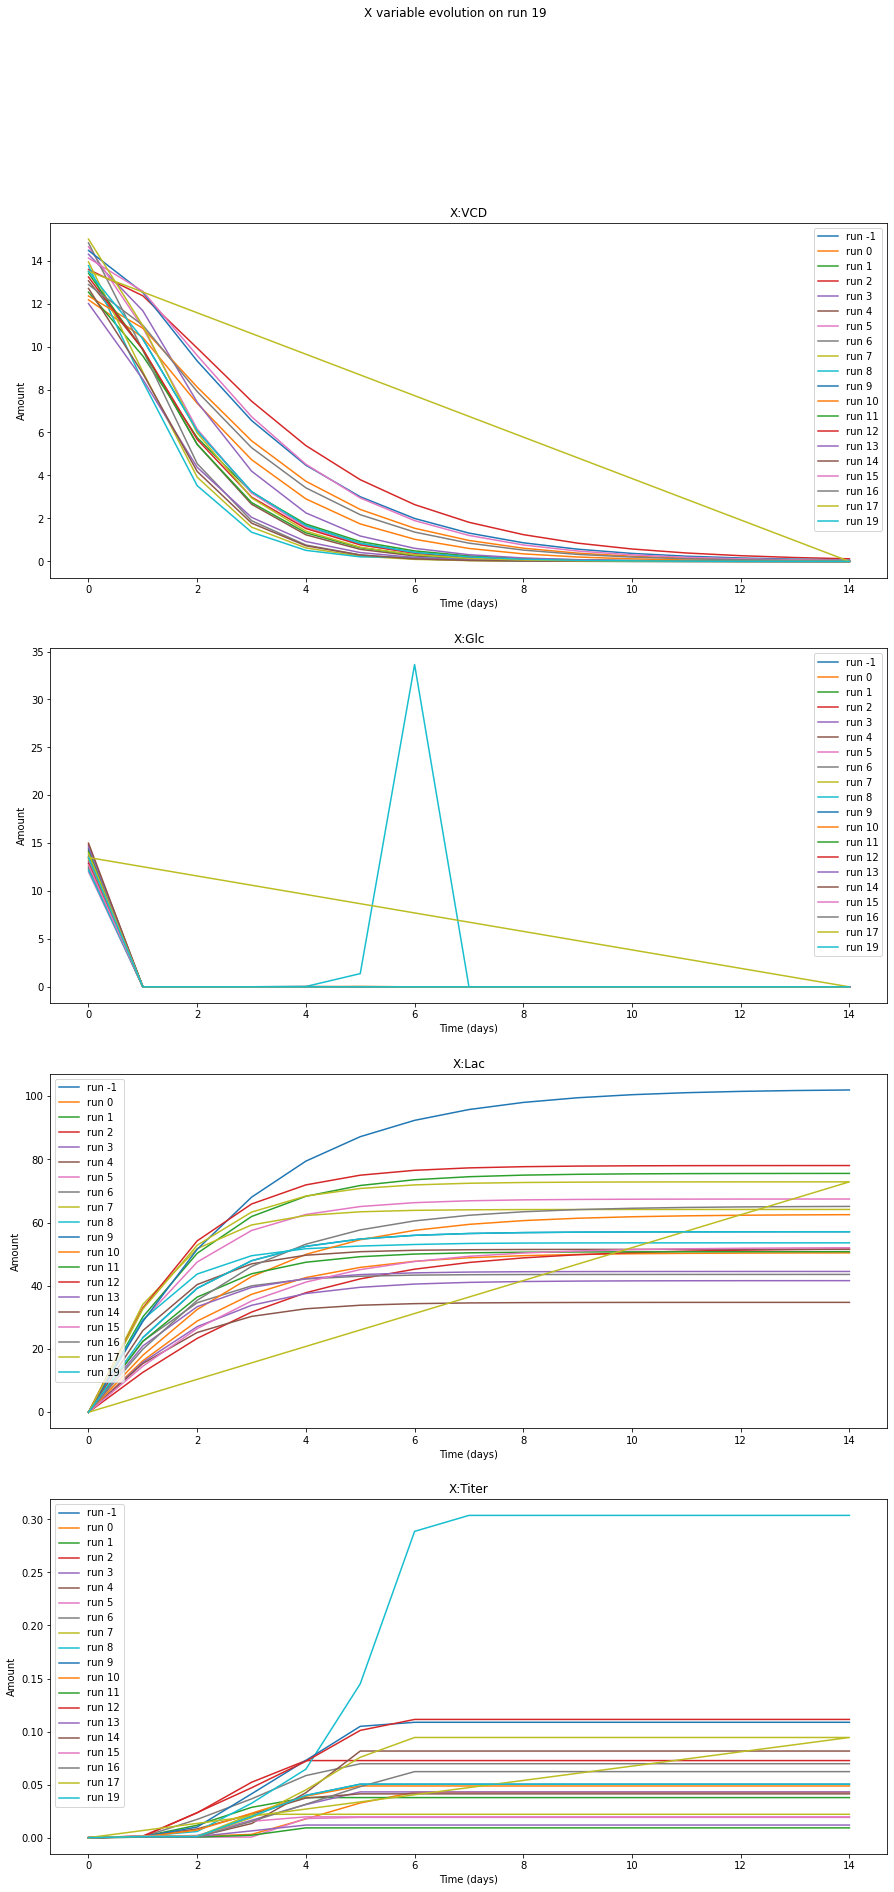

In [71]:
fig, axs = plt.subplots(num_vars,figsize=(15,30))
units_list =[""]
for run_ix,run in owu.groupby("run"):
    fig.suptitle(f'X variable evolution on run {run_ix}')
    for plot_ix, col in enumerate(columns):
        axs[ plot_ix].plot(run.index.get_level_values("timestamps"),list(run[col].values),label=f'run {run_ix}')
        axs[ plot_ix].set_title(f'{col}')
        #plt.subplots_adjust(right=3)
        axs[ plot_ix].set_xlabel("Time (days)")
        axs[ plot_ix].set_ylabel("Amount")
        axs[plot_ix].legend(loc="best")


## PCA Analysis of the OWU Matrix

Beyond just visualisation, the OWU matrix can also be utilised to plot the degree of correlation between the different variables. For instance, below, the correlation matrix of our variables will be shown

In [23]:
owu.corr()

,X:VCD,X:Glc,X:Lac,X:Titer
X:VCD,1.000000,0.589085,-0.761011,-0.414031
X:Glc,0.589085,1.000000,-0.546781,-0.069676
X:Lac,-0.761011,-0.546781,1.000000,0.414293
X:Titer,-0.414031,-0.069676,0.414293,1.000000


### PCA on "unnormalised" data

Here, PCA will be applied to the data before any normalisation is applied

In [24]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components = 4)
pca.fit(owu)
expl_var = pca.explained_variance_
expl_var_ratio_ = pca.explained_variance_ratio_
expl_var

array([4.50205404e+02, 1.18226788e+01, 5.68135656e+00, 2.27941239e-03])

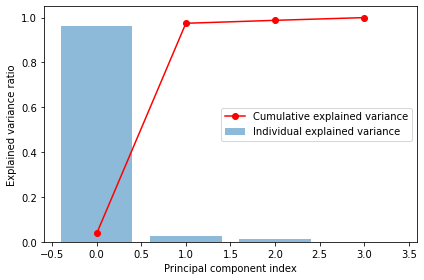

In [25]:
import numpy as np

cum_sum_exp = np.cumsum(expl_var_ratio_)
plt.bar(range(0,len(expl_var_ratio_)), expl_var_ratio_, alpha=0.5, align='center', label='Individual explained variance')
#plt.step(range(0,len(expl_var_ratio_)), expl_var_ratio_, where='mid',label='Cumulative explained variance')
plt.plot(range(0,len(expl_var_ratio_)), 1-expl_var_ratio_,"ro-",label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.legend(loc='best')
plt.show()

### Normalised PCA

Now, PCA will be ran on normalised data

In [26]:
from sklearn.preprocessing import StandardScaler

data_scaler = StandardScaler()

scaled_data = data_scaler.fit_transform(owu)
scaled_data

array([[ 2.2928859 ,  3.16044658, -2.37157398, -0.85277461],
       [ 1.87265056, -0.26325509, -1.58930967, -0.82803437],
       [ 1.13819393, -0.26330687, -0.98635096, -0.82791069],
       ...,
       [-0.62311942, -0.26331883,  0.36920031,  0.05869474],
       [-0.62385821, -0.26332362,  0.36960293,  0.0586948 ],
       [-0.62422289, -0.2632765 ,  0.36980167,  0.05869465]])

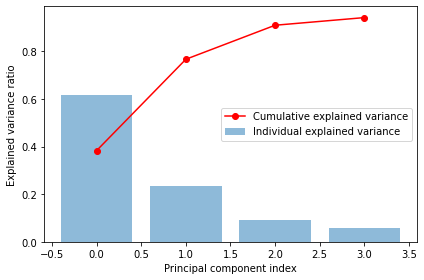

In [27]:
pca.fit(scaled_data)
expl_var_scaled = pca.explained_variance_
expl_var_ratio_scaled = pca.explained_variance_ratio_
expl_var_scaled

cum_sum_exp = np.cumsum(expl_var_ratio_scaled)
plt.bar(range(0,len(expl_var_ratio_scaled)), expl_var_ratio_scaled, alpha=0.5, align='center', label='Individual explained variance')
plt.plot(range(0,len(expl_var_ratio_scaled)), 1-expl_var_ratio_scaled,"ro-",label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.legend(loc='best')
plt.show()

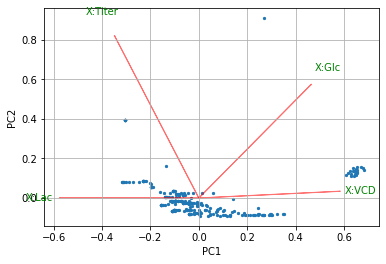

In [28]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley,s=5)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'r',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'green', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'g', ha = 'center', va = 'center')
 
    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))
    plt.grid()
pca_data = pca.fit_transform(scaled_data)
myplot(pca_data[:,0:2],np.transpose(pca.components_[0:2, :]),list(owu.columns))